In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
from collections import Counter
print(f"Originally: {Counter(df['Outcome'])}")

Originally: Counter({0: 500, 1: 268})


<Axes: xlabel='Outcome', ylabel='Count'>

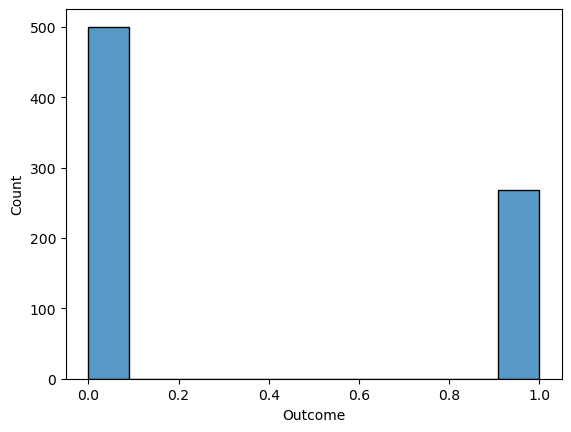

In [5]:
!pip install imblearn

NameError: name 'X' is not defined

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]
X,y = oversample.fit_resample(X,y)

In [10]:
X.shape

(1000, 8)

In [11]:
y.shape

(1000,)

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
X.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI        DiabetesPedigreeFunction  Age
0            57       60             0              0        21.700000  0.735000                  67     1
5            137      108            0              0        48.800000  0.227000                  37     1
             122      86             0              0        34.700000  0.290000                  33     1
             123      74             40             77       34.100000  0.269000                  28     1
             124      74             0              0        34.000000  0.220000                  38     1
                                                                                                        ..
2            96       68             13             49       21.100000  0.647000                  26     1
             98       60             17             120      34.700000  0.198000                  22     1
                      82             26   

In [13]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [14]:
final_df = pd.concat([X,y],axis=1)

In [15]:
final_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,0,121,88,50,222,48.743729,0.380415,31,1
996,8,170,109,28,238,43.713131,0.600757,51,1
997,7,188,78,0,0,47.025384,0.146945,44,1
998,0,150,0,0,0,41.058584,0.685173,30,1


In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


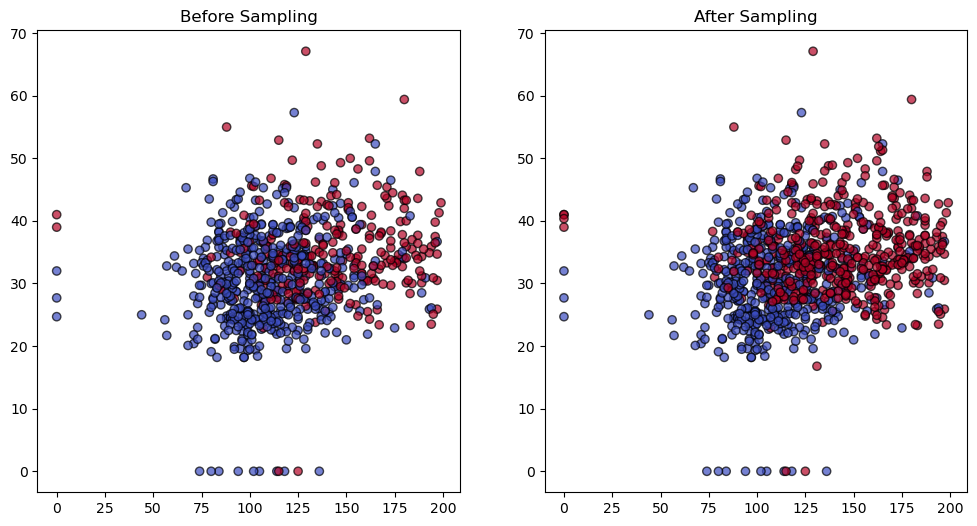

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(12,6))

axes[0].scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='coolwarm', alpha=0.7, edgecolor='k')
axes[0].set_title("Before Sampling")


axes[1].scatter(final_df['Glucose'],final_df['BMI'], c=final_df['Outcome'], cmap='coolwarm', alpha=0.7, edgecolor='k')
axes[1].set_title("After Sampling")

plt.show()




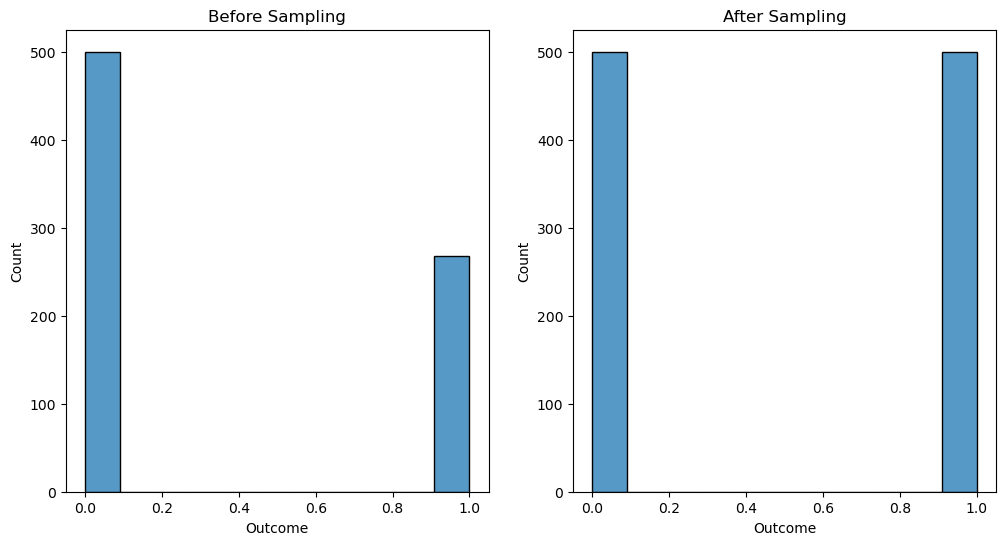

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12,6))
import seaborn as sns
sns.histplot(df['Outcome'],ax=axes[0])
axes[0].set_title("Before Sampling")


sns.histplot(final_df['Outcome'],ax=axes[1])
axes[1].set_title("After Sampling")

plt.show()

In [23]:
final_df['Outcome'].value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='Count'>

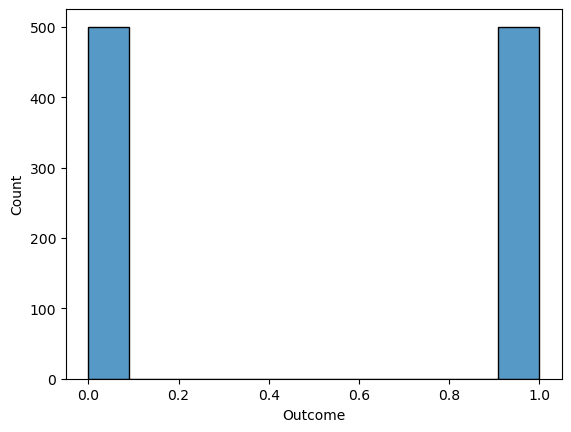

In [20]:
sns.histplot(final_df['Outcome'])